<a href="https://colab.research.google.com/github/yusfad1/deeplearning-classification-of-common-maternal-fetal-ultrasound-planes-ResNet50/blob/main/Classification_ResNet50_fetal_palanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Evaluation of deep convolutional neural networks for automatic classification of common maternal fetal ultrasound planes**

**This Notebook released by:**


*   *Youssef Fadoul*
*   Othmane Habib Allah



---



***Import of all the required libraries***



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as img
from sklearn.metrics import f1_score 
import tensorflow as tf
import pathlib
import random
import tensorflow.keras.backend as K
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras import optimizers, models, layers
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPool2D
from keras.models import Model, Sequential
from keras.preprocessing import image as image_utils

In [ ]:
!pip install zenodo_get

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=07b3d21e63b8367d7a8f30e80e8698a17e6fef95f64e948fe99e638421fe551f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
!zenodo_get 10.5281/zenodo.3904280

Title: FETAL_PLANES_DB: Common maternal-fetal ultrasound images
Keywords: medical imaging, fetal images, ultrasound
Publication date: 2020-06-23
DOI: 10.5281/zenodo.3904280
Total size: 1991.8 MB

Link: https://zenodo.org/api/files/96dbe68a-2af6-476a-8346-ef90bcd35bce/FETAL_PLANES_ZENODO.zip   size: 1991.8 MB

Checksum is correct. (2a5fcc2cefb789bcc0f6c1f73e0ea43f)
All files have been downloaded.


In [ ]:
!unzip "FETAL_PLANES_ZENODO.zip"

Streaming output truncated to the last 5000 lines.
 extracting: Images/Patient01217_Plane1_4_of_5.png  
 extracting: Images/Patient01217_Plane1_5_of_5.png  
 extracting: Images/Patient01217_Plane2_1_of_1.png  
 extracting: Images/Patient01217_Plane3_1_of_2.png  
  inflating: Images/Patient01217_Plane3_2_of_2.png  
 extracting: Images/Patient01217_Plane5_1_of_1.png  
 extracting: Images/Patient01218_Plane1_10_of_11.png  
 extracting: Images/Patient01218_Plane1_11_of_11.png  
 extracting: Images/Patient01218_Plane1_1_of_11.png  
 extracting: Images/Patient01218_Plane1_2_of_11.png  
 extracting: Images/Patient01218_Plane1_3_of_11.png  
 extracting: Images/Patient01218_Plane1_4_of_11.png  
 extracting: Images/Patient01218_Plane1_5_of_11.png  
 extracting: Images/Patient01218_Plane1_6_of_11.png  
  inflating: Images/Patient01218_Plane1_7_of_11.png  
 extracting: Images/Patient01218_Plane1_8_of_11.png  
  inflating: Images/Patient01218_Plane1_9_of_11.png  
 extracting: Images/Patient01218_Pl

***Import the csv of the dataset***

In [ ]:
df = pd.read_csv("FETAL_PLANES_DB_data.csv", sep=";")

In [ ]:
df

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00001_Plane1_1_of_15,1,Other,Not A Brain,Other,Aloka,1
1,Patient00001_Plane1_2_of_15,1,Other,Not A Brain,Other,Aloka,1
2,Patient00001_Plane1_3_of_15,1,Other,Not A Brain,Other,Aloka,1
3,Patient00001_Plane1_4_of_15,1,Other,Not A Brain,Other,Aloka,1
4,Patient00001_Plane1_5_of_15,1,Other,Not A Brain,Other,Aloka,1
...,...,...,...,...,...,...,...
12395,Patient01791_Plane5_1_of_1,1791,Fetal femur,Not A Brain,Other,Voluson S10,0
12396,Patient01792_Plane2_1_of_1,1792,Fetal abdomen,Not A Brain,Other,Voluson E6,0
12397,Patient01792_Plane3_1_of_1,1792,Fetal brain,Trans-thalamic,Other,Voluson E6,0
12398,Patient01792_Plane5_1_of_1,1792,Fetal femur,Not A Brain,Other,Voluson E6,0


In [ ]:
df.dtypes

Image_name     object
Patient_num     int64
Plane          object
Brain_plane    object
Operator       object
US_Machine     object
Train           int64
dtype: object

In [ ]:
df_train= df[df["Train "]==1]
df_test= df[df["Train "]==0]

In [ ]:
df_train

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00001_Plane1_1_of_15,1,Other,Not A Brain,Other,Aloka,1
1,Patient00001_Plane1_2_of_15,1,Other,Not A Brain,Other,Aloka,1
2,Patient00001_Plane1_3_of_15,1,Other,Not A Brain,Other,Aloka,1
3,Patient00001_Plane1_4_of_15,1,Other,Not A Brain,Other,Aloka,1
4,Patient00001_Plane1_5_of_15,1,Other,Not A Brain,Other,Aloka,1
...,...,...,...,...,...,...,...
7501,Patient01225_Plane6_1_of_2,1225,Fetal thorax,Not A Brain,Op. 1,Voluson E6,1
7502,Patient01225_Plane6_2_of_2,1225,Fetal thorax,Not A Brain,Op. 1,Voluson E6,1
7503,Patient01226_Plane2_1_of_1,1226,Fetal abdomen,Not A Brain,Op. 1,Voluson E6,1
7504,Patient01226_Plane3_1_of_1,1226,Fetal brain,Trans-thalamic,Op. 1,Voluson E6,1


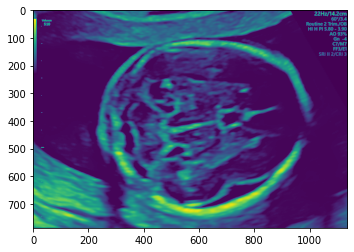

In [ ]:
image = img.imread('Images/'+df.Image_name[(random.randint(0, len(df)))]+'.png')
plt.imshow(image)

In [ ]:
df_train['Image_name'] = df_train['Image_name'].apply(lambda x : x + '.png' )
df_test['Image_name'] = df_test['Image_name'].apply(lambda x : x + '.png' )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_train

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00001_Plane1_1_of_15.png,1,Other,Not A Brain,Other,Aloka,1
1,Patient00001_Plane1_2_of_15.png,1,Other,Not A Brain,Other,Aloka,1
2,Patient00001_Plane1_3_of_15.png,1,Other,Not A Brain,Other,Aloka,1
3,Patient00001_Plane1_4_of_15.png,1,Other,Not A Brain,Other,Aloka,1
4,Patient00001_Plane1_5_of_15.png,1,Other,Not A Brain,Other,Aloka,1
...,...,...,...,...,...,...,...
7501,Patient01225_Plane6_1_of_2.png,1225,Fetal thorax,Not A Brain,Op. 1,Voluson E6,1
7502,Patient01225_Plane6_2_of_2.png,1225,Fetal thorax,Not A Brain,Op. 1,Voluson E6,1
7503,Patient01226_Plane2_1_of_1.png,1226,Fetal abdomen,Not A Brain,Op. 1,Voluson E6,1
7504,Patient01226_Plane3_1_of_1.png,1226,Fetal brain,Trans-thalamic,Op. 1,Voluson E6,1


***Split the Dataset*** 

In [ ]:
# Data Generator & augmentation 
datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

In [ ]:
IMAGE_SIZE = (256, 256, 3)
IMAGE_SIZE[:-1]

(256, 256)

In [ ]:
train_ds = datagen.flow_from_dataframe(dataframe=df_train,
                                       directory='Images',
                                       x_col = 'Image_name',
                                       y_col = 'Plane',
                                       subset='training',
                                       class_mode='categorical',
                                       color_mode='rgb',
                                       seed=43,
                                       target_size=IMAGE_SIZE[:-1],
                                       batch_size=32)

valid_ds = datagen.flow_from_dataframe(dataframe=df_train,
                                       directory='Images',
                                       x_col = 'Image_name',
                                       y_col = 'Plane',
                                       subset='validation',
                                       class_mode='categorical',
                                       color_mode='rgb',
                                       seed=43,
                                       target_size=IMAGE_SIZE[:-1],
                                       batch_size=32)
test_ds = datagen.flow_from_dataframe(dataframe=df_test,
                                       directory='Images',
                                       x_col = 'Image_name',
                                       class_mode=None,
                                       color_mode='rgb',
                                       target_size=IMAGE_SIZE[:-1],
                                       batch_size=32)

Found 5704 validated image filenames belonging to 6 classes.
Found 1425 validated image filenames belonging to 6 classes.
Found 5271 validated image filenames.


***Import of the Pre-trained Model***

In [ ]:
# we will use the transfer learning Resnet50 model for our problem
resnet = ResNet50(
    input_shape = IMAGE_SIZE,
    weights = 'imagenet',
    include_top = False
)

In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
train_ds


In [ ]:
resnet.trainable = False 
model = Sequential([resnet, 
                    Flatten(),
                    Dense(512, activation="relu"),
                    Dense(6, activation="softmax")])

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=10,validation_data=valid_ds)

Epoch 1/10
179/179 [==============================] - 81s 430ms/step - loss: 5.7110 - accuracy: 0.4814 - val_loss: 1.6763 - val_accuracy: 0.4449
Epoch 2/10
179/179 [==============================] - 74s 410ms/step - loss: 0.9683 - accuracy: 0.6932 - val_loss: 0.9087 - val_accuracy: 0.6561
Epoch 3/10
179/179 [==============================] - 74s 413ms/step - loss: 0.8694 - accuracy: 0.7193 - val_loss: 0.6002 - val_accuracy: 0.7719
Epoch 4/10
179/179 [==============================] - 74s 411ms/step - loss: 0.6713 - accuracy: 0.7717 - val_loss: 1.1439 - val_accuracy: 0.4681
Epoch 5/10
179/179 [==============================] - 74s 413ms/step - loss: 0.6172 - accuracy: 0.7851 - val_loss: 2.2875 - val_accuracy: 0.2737
Epoch 6/10
179/179 [==============================] - 74s 411ms/step - loss: 0.5696 - accuracy: 0.7980 - val_loss: 0.8773 - val_accuracy: 0.6856
Epoch 7/10
179/179 [==============================] - 74s 411ms/step - loss: 0.6305 - accuracy: 0.7768 - val_loss: 1.9757 - val_ac

***Model Evaluation***

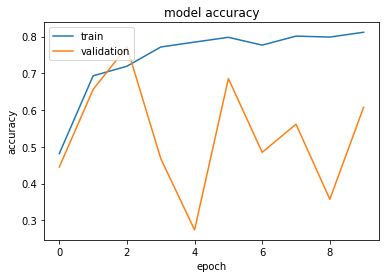

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

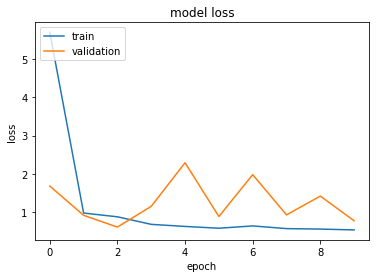

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_ds).argmax(axis=1)

In [ ]:
train_ds.class_indices

{'Fetal abdomen': 0,
 'Fetal brain': 1,
 'Fetal femur': 2,
 'Fetal thorax': 3,
 'Maternal cervix': 4,
 'Other': 5}

In [ ]:
print(len(predictions))

5271


In [ ]:
predicted = np.array([list(train_ds.class_indices.keys())[i] for i in predictions])

In [ ]:
predicted

array(['Other', 'Fetal brain', 'Fetal thorax', ..., 'Fetal femur',
       'Other', 'Fetal brain'], dtype='<U15')

***Making Predictions***

In [ ]:
from tensorflow.keras.preprocessing import image
def test_image(path, image_name, model):
    img = image.load_img(path + image_name, target_size = IMAGE_SIZE)
    print('Original Image')
    plt.imshow(img)
    x = image.img_to_array(img)
    x = x / 255
    x = np.expand_dims(x, axis = 0)
    img_data = preprocess_input(x)
    a = np.argmax(model.predict(img_data), axis = 1)
    class_names=list(train_ds.class_indices.keys())
    print("the predicted class is : ", class_names[int(a)])
    

Original Image
the predicted class is :  Other


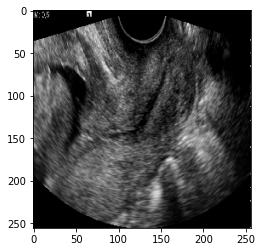

In [ ]:
for i in df_test['Image_name'].sample():
  test_image("Images/",i,model)